# Проектная работа 6. Аналитика Яндекс Афиши. 

### Задание <a id="step0"></a>   
Помочь маркетологам снизить расходы — отказаться от невыгодных источников трафика и перераспределить бюджет.

Есть данные Яндекс.Афиши с июня 2017 по конец мая 2018 года:

    лог сервера с данными о посещениях сайта Яндекс.Афиши,
    выгрузка всех заказов за этот период,
    статистика рекламных расходов.

Вам предстоит изучить:

    как клиенты пользуются сервисом,
    когда делают первые покупки на сайте,
    сколько денег приносит компании каждый клиент,
    когда расходы на привлечение клиента окупаются.

Выручка измеряется в условных единицах — у.е.

## Оглавление

1. [Задание](#step0)  
2. [Шаг 1. Загрузка данных и подготовка их к анализу](#step1)  
3. [Шаг 2. Рассчёт метрик и построение графиков ](#step2)
    1. [2.1. Продуктовые метрики](#step2.1)
    2. [2.2. Метрики электронной коммерции](#step2.2)
    3. [2.3. Маркетинговые метрики](#step2.3)
4. [Шаг 3. Формулирование выводов и рекомендаций](#step3)


### Шаг 1. Получение данных с сайта по URL <a id="step1"></a>   
**Задание :**
* Положите данные о визитах, заказах и рекламных расходах в переменные;

* Подготовьте данные. Убедитесь, что тип данных во всех колонках соответствует сохранённым в них значениям.


    Пути к файлам:
    визиты: /datasets/visits_log.csv. 
    заказы: /datasets/orders_log.csv. 
    расходы: /datasets/costs.csv. 

In [1]:
# Импорт необходимых библиотек
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
costs = pd.read_csv('6_project_data\\costs.csv')
orders = pd.read_csv('6_project_data\\orders_log.csv')
visits = pd.read_csv('6_project_data\\visits_log.csv')

In [3]:
#Изучим выгруженную таблицу costs

display(costs.info())
display (costs)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


None

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


In [4]:
# Изменим тип колонки dt на datetime
costs.dt = pd.to_datetime(costs.dt)
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [5]:
#Изучим выгруженную таблицу orders

display(orders.info())
display (orders)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


None

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


In [6]:
# Приведем названия колонок orders к нижнему регистру и поменяем тип колонки buy_ts

orders.columns = orders.columns.str.lower().str.replace(' ', '_')
orders.buy_ts = pd.to_datetime(orders.buy_ts)
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [7]:
#Изучим выгруженную таблицу visits

display(visits.info())
display (visits)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


None

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485


In [8]:
# Приведем названия колонок visits к нижнему регистру и поменяем тип колонок end_ts, start_ts      

visits.columns = visits.columns.str.lower().str.replace(' ', '_')
visits.end_ts = pd.to_datetime(visits.end_ts)
visits.start_ts = pd.to_datetime(visits.start_ts)
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


### Описание данных:

### Вывод

Пустых значений нет. Для дальнейшего анализа и визуализации данных необходимо было привести значения в удобный для анализа формат данных.

### Шаг 2. Рассчёт метрик и построение графиков <a id="step2"></a>   
**Задание :**
Посчитайте метрики трёх видов:

1. продуктовые,
2. метрики электронной коммерции,
3. маркетинговые.

**2.1. Продуктовые метрики:** <a id="step2.1"></a>   

    2.1.1. Рассчитайте DAU, WAU и MAU. Вычислите средние значения этих метрик за весь период. Отобразите изменения метрик во времени на графиках;
    2.1.2. Определите, сколько раз за день пользователи в среднем заходят на сайт. Постройте график, отражающий изменения метрики во времени;
    2.1.3. Исследуйте, сколько времени пользователи проводят на сайте. Узнайте  продолжительность типичной пользовательской сессии за весь период. Чтобы выбрать подходящую среднюю меру, постройте график распределения. Изменение продолжительности сессий во времени изучать необязательно;
    2.1.4. Рассчитайте Retention Rate, применяя когортный анализ. Покажите изменения метрики во времени на графике. Найдите средний Retention Rate на второй месяц «жизни» когорт.


In [9]:
# Добавим в visits колонки с окрудглением колонки start_ts до дня, недели и месяца соотвественно

visits['start_ts_day'] = visits.start_ts.astype('datetime64[D]')
visits['start_ts_week'] = visits.start_ts.astype('datetime64[W]')
visits['start_ts_month'] = visits.start_ts.astype('datetime64[M]')
visits.head()

,device,end_ts,source_id,start_ts,uid,start_ts_day,start_ts_week,start_ts_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-14,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-15,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-29,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-17,2018-05-01
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-21,2017-12-01


In [10]:
# 
DAU = visits.groupby('start_ts_day').uid.nunique().reset_index()
WAU = visits.groupby('start_ts_week').uid.nunique().reset_index()
MAU = visits.groupby('start_ts_month').uid.nunique().reset_index()

Text(0.5, 1.0, 'Количество посетителей в месяц')

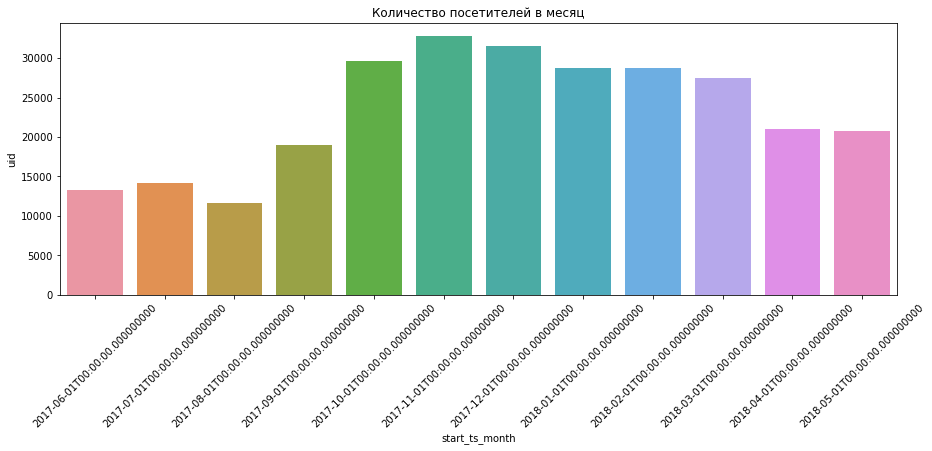

In [11]:
# Анализ показателя MAU
plt.figure(figsize=(15,5))
a=sns.barplot(data=MAU, x='start_ts_month', y='uid')
plt.xticks(rotation= 45)
a.set_title('Количество посетителей в месяц')

In [12]:
display(MAU)
display(MAU.describe())

,start_ts_month,uid
0,2017-06-01,13259
1,2017-07-01,14183
2,2017-08-01,11631
3,2017-09-01,18975
4,2017-10-01,29692
5,2017-11-01,32797
6,2017-12-01,31557
7,2018-01-01,28716
8,2018-02-01,28749
9,2018-03-01,27473


,uid
count,12.000000
mean,23228.416667
std,7546.380462
min,11631.000000
25%,17777.000000
50%,24240.500000
75%,28984.750000
max,32797.000000


Резкий рост посетителей можно отметить 2017-10-01. После 2017-11-01 происходит медленное снижение. В средней за месяц около 23 000 посетителей.

Text(0.5, 1.0, 'Количество посетителей в месяц')

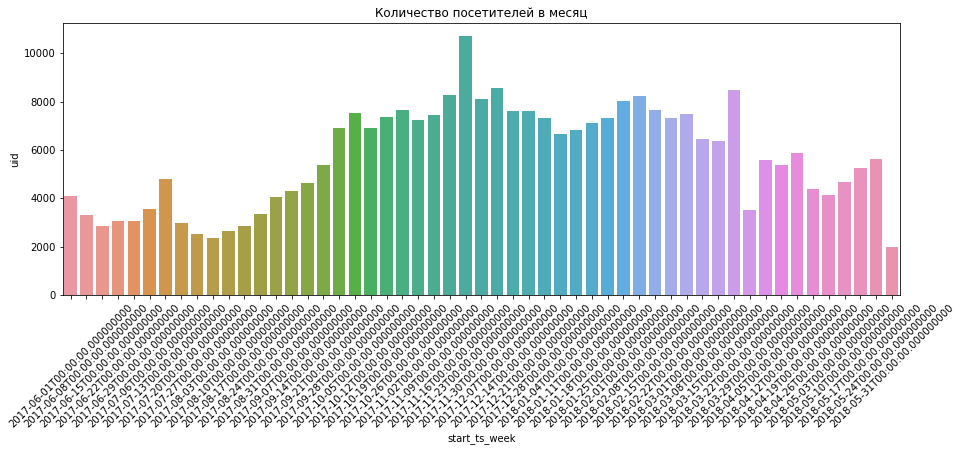

In [13]:
# Анализ показателя WAU
plt.figure(figsize=(15,5))
a=sns.barplot(data=WAU, x='start_ts_week', y='uid')
plt.xticks(rotation= 45)
a.set_title('Количество посетителей в месяц')

In [14]:
display(WAU.head(10))
display(WAU.describe())

,start_ts_week,uid
0,2017-06-01,4082
1,2017-06-08,3311
2,2017-06-15,2844
3,2017-06-22,3079
4,2017-06-29,3055
5,2017-07-06,3563
6,2017-07-13,4790
7,2017-07-20,2978
8,2017-07-27,2505
9,2017-08-03,2343


,uid
count,53.000000
mean,5724.415094
std,2096.119936
min,1997.000000
25%,4056.000000
50%,5894.000000
75%,7441.000000
max,10716.000000


Рост посетителей точнее виден по данному показателю. В средней за неделю около 5 700 - 5 800 посетителей.

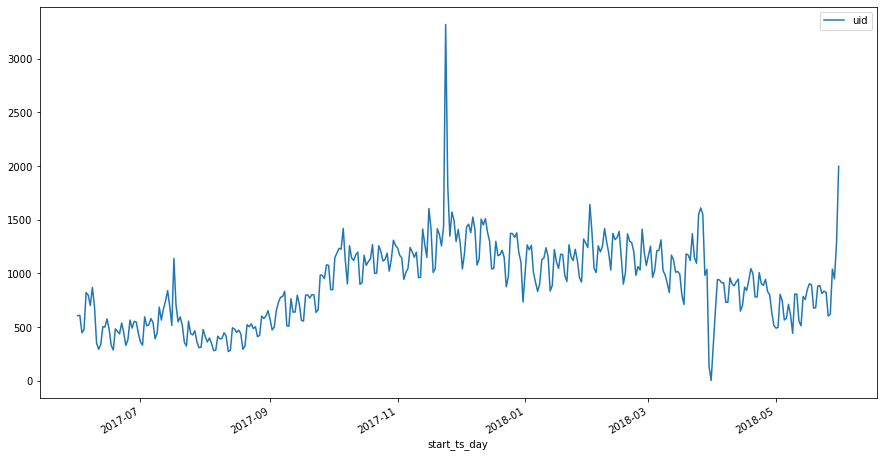

In [15]:
DAU.pivot_table(index='start_ts_day', aggfunc=({'uid':'sum'})).plot(figsize=(15,8))
plt.show()

In [16]:
display(DAU.head())
display(DAU.describe())

,start_ts_day,uid
0,2017-06-01,605
1,2017-06-02,608
2,2017-06-03,445
3,2017-06-04,476
4,2017-06-05,820


,uid
count,364.000000
mean,907.991758
std,370.513838
min,1.000000
25%,594.000000
50%,921.000000
75%,1173.000000
max,3319.000000


В средней за день около 907 посетителей.

In [17]:
# Количество сессий в день
visits_per_day = visits.groupby('start_ts_day').agg({'uid': 'count'}).rename(columns={'uid':'n_sessions'}).reset_index()
visits_per_day

,start_ts_day,n_sessions
0,2017-06-01,664
1,2017-06-02,658
2,2017-06-03,477
3,2017-06-04,510
4,2017-06-05,893
...,...,...
359,2018-05-27,672
360,2018-05-28,1156
361,2018-05-29,1035
362,2018-05-30,1410


In [18]:
mean_visits_per_day = visits_per_day.n_sessions.mean()
median_visits_per_day = visits_per_day.n_sessions.median()
print(f'Среднее количество сессий в день {int(mean_visits_per_day)} - {int(median_visits_per_day)}')

Среднее количество сессий в день 987 - 1003


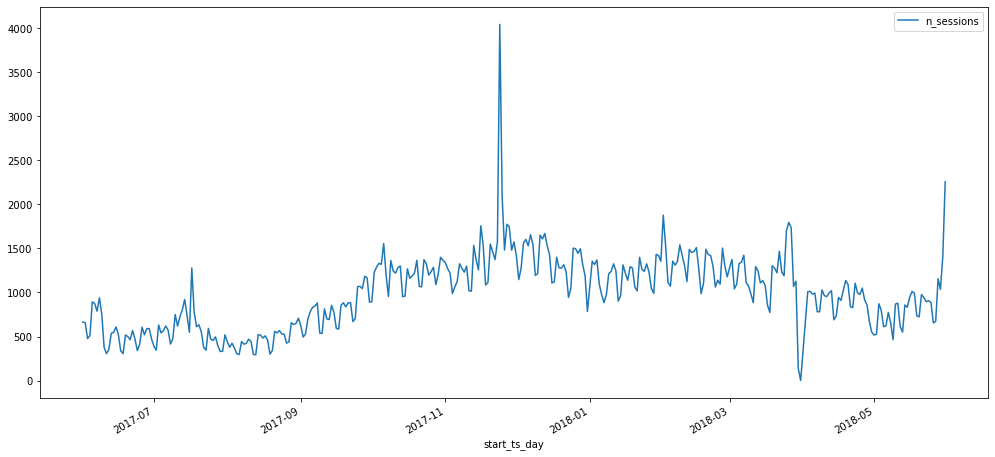

In [19]:
visits_per_day.plot(y='n_sessions', x='start_ts_day', figsize=(17,8))
plt.show()

Определили, сколько раз за день пользователи в среднем заходят на сайт и построили график, отражающий изменения метрики во времени.

<AxesSubplot:>

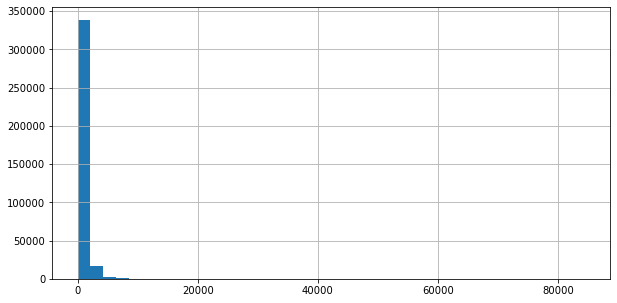

In [20]:
visits['session_duration'] = (visits.end_ts - visits.start_ts).dt.seconds
visits.session_duration.hist(bins=40, figsize=(10,5))

По графику видно что распределение не нормальное, смещено к 0. Для определения средней меры необходимо вычислить моду.

In [21]:
# Вычислим среднюю продолжительность сессии по медиане, дополнительно укажим самую частую продолжительность по моде
print(f'Примерная средняя продолжительность сессии - {int(visits.session_duration.median())} секунд')
print(f'Частая продолжительность сессии - {visits.session_duration.mode()[0]} секунд')

Примерная средняя продолжительность сессии - 300 секунд
Частая продолжительность сессии - 60 секунд


Для расчета Retention Rate сформирует когорту

In [22]:
# Получим дату первого визита для каждого пользователя
first_visits_customers = visits.groupby('uid').start_ts.min().dt.date.reset_index().\
    rename(columns={'start_ts':'first_visit'})
# Добавим колонку first_visit в таблицу visits
visits = visits.merge(first_visits_customers, on='uid')

,first_visit_month,cohort_lifetime,users_count
0,2017-06-01,0,13259
1,2017-06-01,1,1043
2,2017-06-01,2,713
3,2017-06-01,3,814
4,2017-06-01,4,909
5,2017-06-01,5,947
6,2017-06-01,6,809
7,2017-06-01,7,766
8,2017-06-01,8,694
9,2017-06-01,9,674


,first_visit_month,cohort_lifetime,users_count,cohort_count
0,2017-06-01,0,13259,13259
1,2017-06-01,1,1043,13259
2,2017-06-01,2,713,13259
3,2017-06-01,3,814,13259
4,2017-06-01,4,909,13259
...,...,...,...,...
73,2018-03-01,1,861,20589
74,2018-03-01,2,557,20589
75,2018-04-01,0,15709,15709
76,2018-04-01,1,760,15709


,first_visit_month,cohort_lifetime,users_count,cohort_count,retention
0,2017-06-01,0,13259,13259,1.000000
1,2017-06-01,1,1043,13259,0.078664
2,2017-06-01,2,713,13259,0.053775
3,2017-06-01,3,814,13259,0.061392
4,2017-06-01,4,909,13259,0.068557
...,...,...,...,...,...
73,2018-03-01,1,861,20589,0.041818
74,2018-03-01,2,557,20589,0.027053
75,2018-04-01,0,15709,15709,1.000000
76,2018-04-01,1,760,15709,0.048380


Cредний Retention Rate на второй месяц «жизни» когорт 6.52%


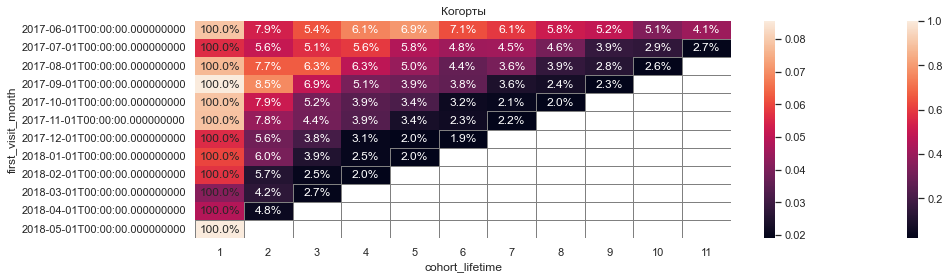

In [23]:
# Когорту формируем помесячно. Выделим из столбца `first_visit` месяцы (в формате первого дня месяца, а не номера месяца, чтобы не возникло пересечения по годам):
visits['first_visit_month'] = visits.first_visit.astype('datetime64[M]')
# Добавим колонку времени жизни когорты
visits['cohort_lifetime'] = ((visits.start_ts_month - visits.first_visit_month)/np.timedelta64(1, 'M')).\
    round().astype('int')
#Сгруппируем данные по месяцу первого визита и lifetime  в таблицу cohorts. Посчитаем для каждой когорты количество активных пользователей на определенный «месяц жизни»:
cohorts = visits.groupby(['first_visit_month','cohort_lifetime']).\
    agg({'uid':'nunique'}).reset_index().rename(columns={'uid':'users_count'})
display(cohorts.head(10))
# Отсортируем количество пользователей на 0 lifetime
initial_users_count = cohorts.loc[cohorts.cohort_lifetime == 0][['first_visit_month', 'users_count']].\
    rename(columns={'users_count':'cohort_count'})
#display(initial_users_count)
# Добавим в таблицу cohorts значения из колонки cohort_count (количество пользователей на 0 lifetime) таблицы initial_users_count
cohorts = cohorts.merge(initial_users_count, on='first_visit_month')
display(cohorts)
# Добавим к таблицу cohorts расчет retention rate в колонку retantion
cohorts['retention'] = (cohorts.users_count / cohorts.cohort_count)
display(cohorts)
# Построим сводную таблицу и heatmap для анализца retention rate 
retention_pivot = cohorts.\
    pivot_table(index='first_visit_month',columns='cohort_lifetime',values='retention',aggfunc='sum')
sns.set(style='white')
plt.figure(figsize=(15,4))
plt.title('Когорты')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='grey')
sns.heatmap(retention_pivot.drop(columns=[0]))
# Расчитаем средний Retention Rate на 2й месяц жизни когорт
retantion_mean_1 = cohorts.loc[cohorts.cohort_lifetime==1].retention.mean()
print(f'Cредний Retention Rate на второй месяц «жизни» когорт {retantion_mean_1:.2%}')


Cредний Retention Rate на второй месяц «жизни» когорт 6.80%


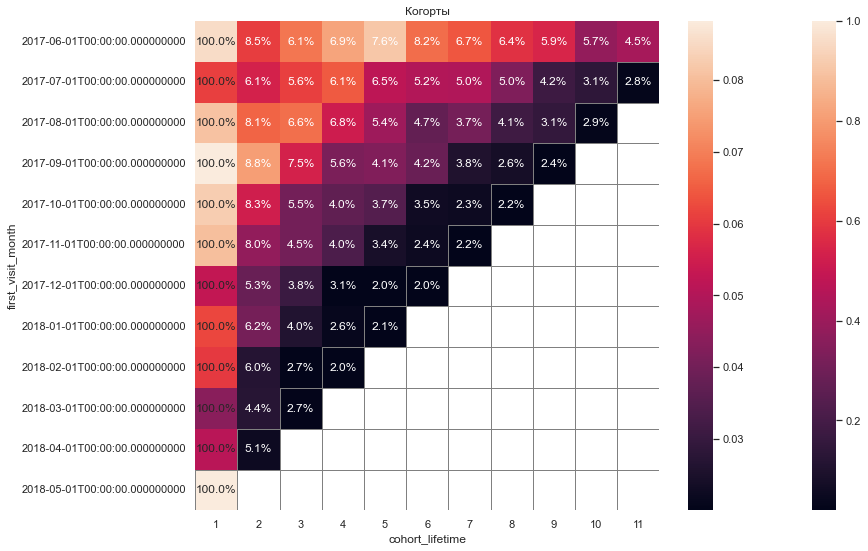

In [24]:
# Сделаем расчет Retention Rate для устройств desktop
visits_desktop = visits.query('device in "desktop"').copy()
#Сгруппируем данные по месяцу первого визита и lifetime  в таблицу cohorts. Посчитаем для каждой когорты количество активных пользователей на определенный «месяц жизни»:
cohorts_desktop = visits_desktop.groupby(['first_visit_month','cohort_lifetime']).\
    agg({'uid':'nunique'}).reset_index().rename(columns={'uid':'users_count'})
#display(cohorts_desktop.head(10))
# Отсортируем количество пользователей на 0 lifetime
initial_users_count = cohorts_desktop.loc[cohorts_desktop.cohort_lifetime == 0][['first_visit_month', 'users_count']].\
    rename(columns={'users_count':'cohort_count'})
#display(initial_users_count)
# Добавим в таблицу cohorts значения из колонки cohort_count (количество пользователей на 0 lifetime) таблицы initial_users_count
cohorts_desktop = cohorts_desktop.merge(initial_users_count, on='first_visit_month')
#display(cohorts_desktop)
# Добавим к таблицу cohorts расчет retention rate в колонку retantion
cohorts_desktop['retention'] = (cohorts_desktop.users_count / cohorts_desktop.cohort_count)
#display(cohorts_desktop)
# Построим сводную таблицу и heatmap для анализца retention rate 
retention_pivot_desktop = cohorts_desktop.\
    pivot_table(index='first_visit_month',columns='cohort_lifetime',values='retention',aggfunc='sum')
sns.set(style='white')
plt.figure(figsize=(13,9))
plt.title('Когорты')
sns.heatmap(retention_pivot_desktop, annot=True, fmt='.1%', linewidths=1, linecolor='grey')
sns.heatmap(retention_pivot_desktop.drop(columns=[0]))
# Расчитаем средний Retention Rate на 2й месяц жизни когорт
retantion_mean_1 = cohorts_desktop.loc[cohorts_desktop.cohort_lifetime==1].retention.mean()
print(f'Cредний Retention Rate на второй месяц «жизни» когорт {retantion_mean_1:.2%}')

Cредний Retention Rate на второй месяц «жизни» когорт 6.20%


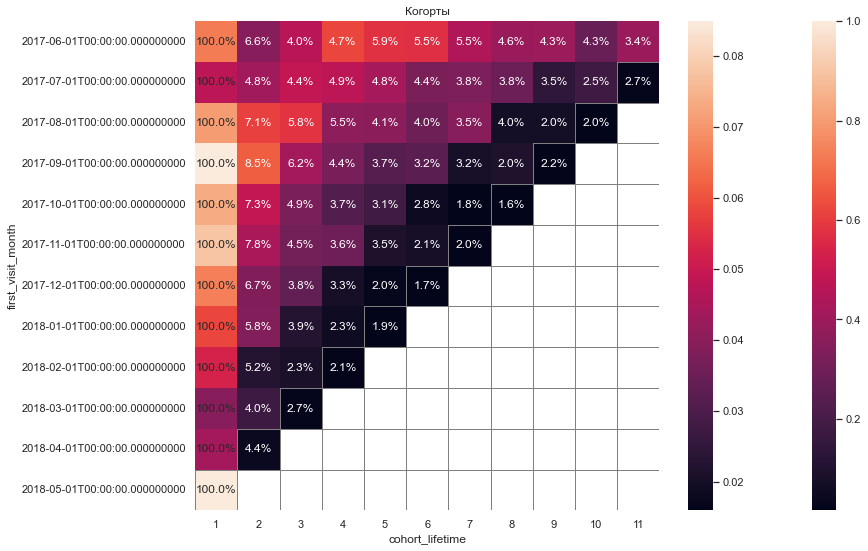

In [25]:
# Сделаем расчет Retention Rate для устройств touch
visits_touch = visits.query('device in "touch"').copy()
#Сгруппируем данные по месяцу первого визита и lifetime  в таблицу cohorts. Посчитаем для каждой когорты количество активных пользователей на определенный «месяц жизни»:
cohorts_touch = visits_touch.groupby(['first_visit_month','cohort_lifetime']).\
    agg({'uid':'nunique'}).reset_index().rename(columns={'uid':'users_count'})
#display(cohorts_touch.head(10))
# Отсортируем количество пользователей на 0 lifetime
initial_users_count = cohorts_touch.loc[cohorts_touch.cohort_lifetime == 0][['first_visit_month', 'users_count']].\
    rename(columns={'users_count':'cohort_count'})
#display(initial_users_count)
# Добавим в таблицу cohorts значения из колонки cohort_count (количество пользователей на 0 lifetime) таблицы initial_users_count
cohorts_touch = cohorts_touch.merge(initial_users_count, on='first_visit_month')
#display(cohorts_touch)
# Добавим к таблицу cohorts расчет retention rate в колонку retantion
cohorts_touch['retention'] = (cohorts_touch.users_count / cohorts_touch.cohort_count)
#display(cohorts_touch)
# Построим сводную таблицу и heatmap для анализца retention rate 
retention_pivot_touch = cohorts_touch.\
    pivot_table(index='first_visit_month',columns='cohort_lifetime',values='retention',aggfunc='sum')
sns.set(style='white')
plt.figure(figsize=(13,9))
plt.title('Когорты')
sns.heatmap(retention_pivot_touch, annot=True, fmt='.1%', linewidths=1, linecolor='grey')
sns.heatmap(retention_pivot_touch.drop(columns=[0]))
# Расчитаем средний Retention Rate на 2й месяц жизни когорт
retantion_mean_1 = cohorts_touch.loc[cohorts_touch.cohort_lifetime==1].retention.mean()
print(f'Cредний Retention Rate на второй месяц «жизни» когорт {retantion_mean_1:.2%}')

### Выводы по продуктовым метрикам

В среднем за день около 907 посетителей. Среднее количество сессий в день равно 987 - 1003. Примерная средняя продолжительность сессии 60 секунд. Люди чаще возвращались в первые месяцы. Также показатели возвращаемости клиентов выше у тех, кто использует Desktop, а не Touch.

- После первого месяца кол-во посетителей когорты значительно сокращается до 4-8%. Это возможно связанно с тем, что клиент скорее всего удовлетворил свои потребности в первый месяц и больше не интересуется услугами, которые предоставляет Яндекс. Афиша, либо ему не понравился сервис. Повлиять на это возможно если напоминать покупателям о услугах после первого месяца. 

- Заметное снижение возвращения клиентов можно отметить после новогодних праздников. Высокие показатели retention rate перед Новым Годом связаны с подготовкой людей к нему, после которого люди имеют меньше стимулов заходить на сайт Афиши. Возможно дополнительные стимулирующие акции для клиентов после Нового Года могут позволить оставить показатели на уровне довогоднего. 

- Примерная средняя продолжительность сессии 60 секунд. То есть большинство сессий весьма короткая. Возможно это свяазано с тем, что посетители, переходя на сайт Афиши для покупки или ознакомления, не тратят время на более детальное ознакомление с услугами Афиши. Это является проблемой, с которой можно справиться более точно подобранными рекомендациями для посетителей, чтобы они тратили больше времени на сайте для новых покупок. 

- Максимальный показатель в 8,55% является низким. Возможно это связано с тем, что клиентам не понравились услуги Афиши, и они пользуются сайтами конкурентов или Афиша не достаточно хорошо привлекает покупателей к дополнительным покупкам, из-за которых они будут еще раз заходить на сайт. Поправить ситуацию можно повышением качества услуг и маркетинга.

**2.2. Метрики электронной коммерции:** <a id="step2.2"> </a>   

    2.2.1. Исследуйте, сколько времени в среднем проходит с момента первого посещения сайта до совершения покупки.  Изучать       изменение этой метрики во времени необязательно;
    2.2.2. Применяя когортный анализ или другой метод, рассчитайте среднее количество покупок на одного покупателя за определённый период, например за 6 месяцев. Изучать изменение этой метрики во времени необязательно;
    2.2.3. Рассчитайте средний чек, применяя группировку по времени совершения покупки. Когортный анализ не подходит — он может исказить расчёты. Постройте график, отражающий изменения метрики во времени;
    2.2.4. Выясните, как меняется LTV на покупателя по когортам. Помните, что LTV — накопительная метрика. Рассчитайте средний LTV по когортам за 6 месяцев; в расчёт включайте когорты, «прожившие» не менее 6 месяцев. Маржинальность сервиса — 100%. Отразите изменения метрики во времени на графике;

In [26]:
# Посчитаем когда в первый раз пришел каждый посетитель
first_visits = visits.sort_values(by = ['uid', 'start_ts']).groupby('uid') \
                     .agg({'start_ts' : 'first', 'source_id': 'first', 'device': 'first'})
first_orders = orders.sort_values(by = ['uid', 'buy_ts']).groupby('uid') \
                     .agg({'buy_ts' : 'first'})
report = first_visits.merge(first_orders, on = 'uid')

# Посчитаем метрики показателя, когда клиенты начинают покупать
report['delta'] = (report['buy_ts'] - report['start_ts'])
#report.query('delta > 0')[['delta']].describe().T
report

,start_ts,source_id,device,buy_ts,delta
uid,,,,,
313578113262317,2017-09-18 22:49:00,2,desktop,2018-01-03 21:51:00,106 days 23:02:00
1575281904278712,2017-06-03 10:13:00,10,touch,2017-06-03 10:13:00,0 days 00:00:00
2429014661409475,2017-10-11 17:14:00,3,desktop,2017-10-11 18:33:00,0 days 01:19:00
2464366381792757,2018-01-27 20:10:00,5,desktop,2018-01-28 15:54:00,0 days 19:44:00
2551852515556206,2017-11-24 10:14:00,5,desktop,2017-11-24 10:14:00,0 days 00:00:00
...,...,...,...,...,...
18445147675727495770,2017-08-20 13:30:00,5,touch,2017-11-24 09:03:00,95 days 19:33:00
18445407535914413204,2017-09-22 23:48:00,3,desktop,2017-09-22 23:55:00,0 days 00:07:00
18445601152732270159,2017-08-07 11:51:00,2,desktop,2018-03-26 22:54:00,231 days 11:03:00


Среднее время до совершения покупки - 21.0 минут
Самое частое время до совершения покупки - 1.0000000000000002 минут


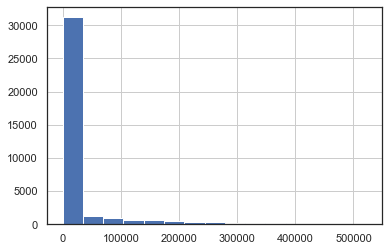

In [27]:
first_visits = visits.groupby(['uid']) \
                     .agg({'start_ts' : 'min', 'source_id':'first', 'device':'first'}).reset_index()
#first_visits
first_orders = orders.groupby('uid').agg({'buy_ts':'min'}).reset_index()
#first_orders
report = first_visits.merge(first_orders, on='uid').\
    rename(columns={'start_ts':'first_visit_date', 'buy_ts':'first_order_date'})
# Добавим колонку для расчета дельты времени между первым входом и первой покупке пользователя. Результат в часах.
report['delta'] = (report.first_order_date - report.first_visit_date).dt.total_seconds() /60
report.delta.hist(bins=15)
# Распределение не нормальное, для определения среднего значеня расчитаем медиану 
print(f"Среднее время до совершения покупки - {report.query('delta > 0').delta.median()} минут")
print(f"Самое частое время до совершения покупки - {report.query('delta > 0').delta.mode()[0]} минут")


Люди начинают покупать в среднем через 21 минуту, но очень много клиентов которые оформляютпокупку за 1 минуту что странно. 

In [28]:
# Получим дату перво покупки для каждого пользователя
first_orders_customers = orders.groupby('uid').buy_ts.min().reset_index().rename(columns={'buy_ts':'first_orders'})
# Добавим колонку first_orders_customers в таблицу orders_cohort
orders_cohort = orders.merge(first_orders_customers, on='uid')

In [29]:
# Добавим колонку first_orders_month с данными о месяце первого заказа для подсчета lifetime в месяцах
orders_cohort['first_orders_month'] =  orders_cohort.first_orders.astype('datetime64[M]')
# Выделим в отдельные колонки месяц дату и неделю заказов (колонки дня и недели пригодятся для расчета среднего чека)
orders_cohort['buy_ts_day'] = orders_cohort.buy_ts.astype('datetime64[D]')
orders_cohort['buy_ts_week'] = orders_cohort.buy_ts.astype('datetime64[W]')
orders_cohort['buy_ts_month'] = orders_cohort.buy_ts.astype('datetime64[M]')

In [30]:
#Расчитаем lifetime пользователя в рамках когорты (по месяцам):
orders_cohort['cohort_lifetime'] = orders_cohort['buy_ts_month'] - orders_cohort['first_orders_month']
orders_cohort.cohort_lifetime = orders_cohort.cohort_lifetime / np.timedelta64(1,'M')
orders_cohort.cohort_lifetime = round(orders_cohort['cohort_lifetime']).astype('int')
# Расчет среднего количество покупок одного покупателя за 6 месяцев 
orders_count_6 = orders_cohort.query('cohort_lifetime < 6').groupby('uid').agg({'buy_ts':'count'}).buy_ts.median()
print(f"Cреднее количество покупок на одного покупателя за 6 месяцев - {orders_count_6}")

Cреднее количество покупок на одного покупателя за 6 месяцев - 1.0


In [31]:
orders_cohort

,buy_ts,revenue,uid,first_orders,first_orders_month,buy_ts_day,buy_ts_week,buy_ts_month,cohort_lifetime
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01,2017-06-01,2017-06-01,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01,2017-06-01,2017-06-01,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01,2017-06-01,2017-06-01,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01,2017-06-01,2017-06-01,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01,2017-06-01,2017-06-01,0
...,...,...,...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31 23:50:00,2018-05-01,2018-05-31,2018-05-31,2018-05-01,0
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31 23:50:00,2018-05-01,2018-05-31,2018-05-31,2018-05-01,0
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31 23:54:00,2018-05-01,2018-05-31,2018-05-31,2018-05-01,0
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31 23:56:00,2018-05-01,2018-05-31,2018-05-31,2018-05-01,0


,count,sum,mean
buy_ts_month,,,
2017-06-01,2354,9557.49,4.06
2017-07-01,2363,12539.47,5.31
2017-08-01,1807,8758.78,4.85
2017-09-01,3387,18345.51,5.42
2017-10-01,5679,27987.70,4.93


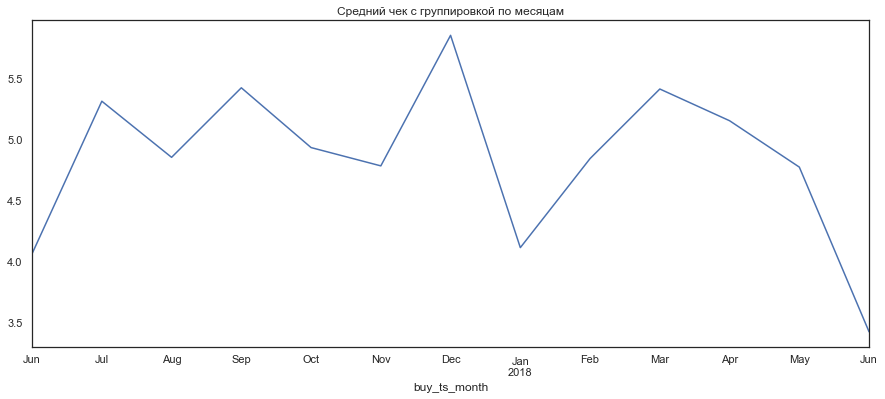

,count,sum,mean
buy_ts_week,,,
2017-06-01,896,2546.66,2.84
2017-06-08,525,2536.51,4.83
2017-06-15,341,1527.33,4.48
2017-06-22,441,2099.22,4.76
2017-06-29,461,2449.82,5.31


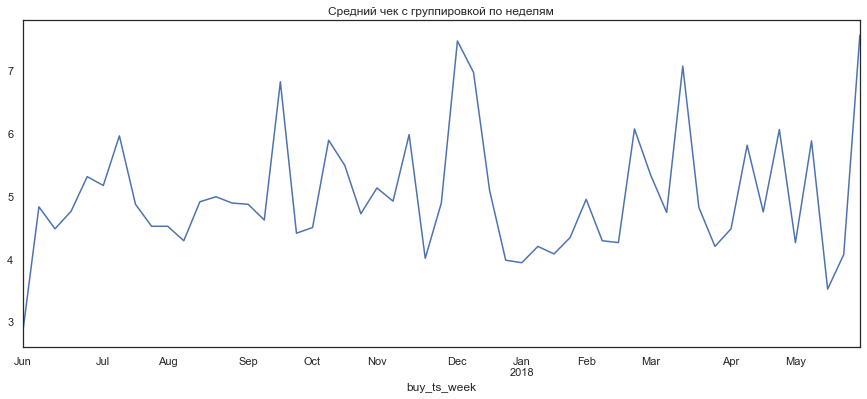

,count,sum,mean
buy_ts_day,,,
2017-06-01,96,389.46,4.06
2017-06-02,111,324.11,2.92
2017-06-03,67,166.48,2.48
2017-06-04,66,195.21,2.96
2017-06-05,161,441.49,2.74


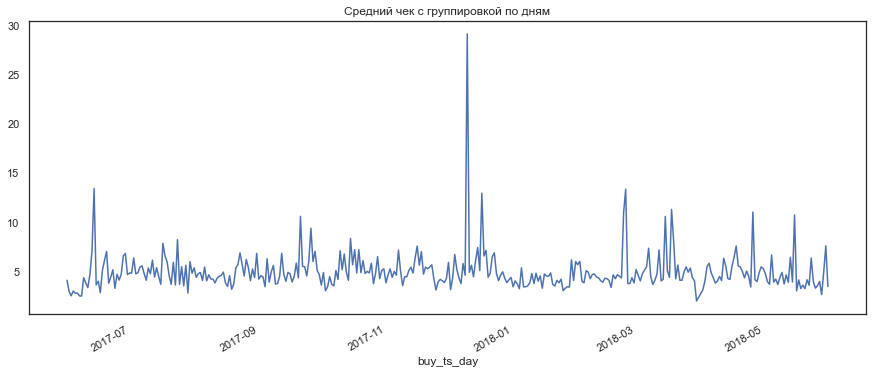

In [32]:
# Расчитаем средний чек за месяц и построим график 
revenue_mean_month = orders_cohort.pivot_table(index='buy_ts_month', values='revenue', aggfunc=('sum','count'))
revenue_mean_month['mean'] = round(revenue_mean_month['sum'] / revenue_mean_month['count'],2)
display(revenue_mean_month.head())
revenue_mean_month['mean'].plot(figsize=(15,6))
plt.title('Средний чек с группировкой по месяцам')
plt.show()

# Расчитаем средний чек за неделю и построим график 
revenue_mean_week = orders_cohort.pivot_table(index='buy_ts_week', values='revenue', aggfunc=('sum','count'))
revenue_mean_week['mean'] = round(revenue_mean_week['sum'] / revenue_mean_week['count'],2)
display(revenue_mean_week.head())
revenue_mean_week['mean'].plot(figsize=(15,6))
plt.title('Средний чек с группировкой по неделям')
plt.show()

# Расчитаем средний чек за день и построим график 
revenue_mean_day = orders_cohort.pivot_table(index='buy_ts_day', values='revenue', aggfunc=('sum','count'))
revenue_mean_day['mean'] = round(revenue_mean_day['sum'] / revenue_mean_day['count'],2)
display(revenue_mean_day.head())
revenue_mean_day['mean'].plot(figsize=(15,6))
plt.title('Средний чек с группировкой по дням')
plt.show()

In [33]:
# Выясним дату, когда был максимальный средний чек 
revenue_mean_day.loc[revenue_mean_day['mean'] == revenue_mean_day['mean'].max()]

,count,sum,mean
buy_ts_day,,,
2017-12-10,160,4661.33,29.13


Средний чек в декабре был самым высоким, что обусловлено подготовкой к рождеству и новому году максимальный средний чек был 2017-12-10. Далее в январе наблюдается резкое снижение, это так же связано с новым годом.

In [34]:
# Для расчета LTV используем ранее полученные данные в orders_cohort 
display(orders_cohort.head())
#Выручка и кол-во заказов для каждого покупателя
uid_sizes = orders_cohort.pivot_table(index='uid', values='revenue', aggfunc=('sum', 'count')).reset_index()
display(uid_sizes.head())
display(uid_sizes['count'].value_counts().head())

# Кол-во покупателей для когорт
cohort_sizes = orders_cohort.groupby('first_orders_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
display(cohort_sizes)

,buy_ts,revenue,uid,first_orders,first_orders_month,buy_ts_day,buy_ts_week,buy_ts_month,cohort_lifetime
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01,2017-06-01,2017-06-01,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01,2017-06-01,2017-06-01,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01,2017-06-01,2017-06-01,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01,2017-06-01,2017-06-01,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01,2017-06-01,2017-06-01,0


,uid,count,sum
0,313578113262317,1,0.55
1,1575281904278712,2,3.05
2,2429014661409475,1,73.33
3,2464366381792757,1,2.44
4,2551852515556206,2,10.99


1    30231
2     4395
3     1086
4      375
5      147
Name: count, dtype: int64

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340
5,2017-11-01,4081
6,2017-12-01,4383
7,2018-01-01,3373
8,2018-02-01,3651
9,2018-03-01,3533


In [35]:
# Объем и количество продаж
orders_revenues = orders_cohort.groupby(['first_orders_month','buy_ts_month']).agg({'revenue': ('sum', 'count')}).reset_index()
orders_revenues.columns = ['first_order_month', 'order_month', 'revenue', 'count']
# Объединяем таблицы
ltv_by_user = cohort_sizes.merge(orders_revenues, on='first_order_month')
display(ltv_by_user)
display(ltv_by_user.info())

,first_order_month,n_buyers,order_month,revenue,count
0,2017-06-01,2023,2017-06-01,9557.49,2354
1,2017-06-01,2023,2017-07-01,981.82,177
2,2017-06-01,2023,2017-08-01,885.34,174
3,2017-06-01,2023,2017-09-01,1931.30,226
4,2017-06-01,2023,2017-10-01,2068.58,292
...,...,...,...,...,...
74,2018-03-01,3533,2018-05-01,1114.87,176
75,2018-04-01,2276,2018-04-01,10600.69,2495
76,2018-04-01,2276,2018-05-01,1209.92,195
77,2018-05-01,2988,2018-05-01,13925.76,3249


<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 0 to 78
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   first_order_month  79 non-null     datetime64[ns]
 1   n_buyers           79 non-null     int64         
 2   order_month        79 non-null     datetime64[ns]
 3   revenue            79 non-null     float64       
 4   count              79 non-null     int64         
dtypes: datetime64[ns](2), float64(1), int64(2)
memory usage: 3.7 KB


None

In [36]:
# Суммарная выручка и кол-во заказов для каждой когорты и ее возраста
#ltv_by_user['first_order_month']=ltv_by_user['first_order_month'].astype('datetime64[M]')
ltv_by_user['lifetime'] = ((ltv_by_user['order_month'] - ltv_by_user['first_order_month']) / np.timedelta64(1, 'M')).\
    round().astype('int')
ltv_by_user['ltv'] = ltv_by_user.revenue / ltv_by_user.n_buyers
display(ltv_by_user)

,first_order_month,n_buyers,order_month,revenue,count,lifetime,ltv
0,2017-06-01,2023,2017-06-01,9557.49,2354,0,4.724414
1,2017-06-01,2023,2017-07-01,981.82,177,1,0.485329
2,2017-06-01,2023,2017-08-01,885.34,174,2,0.437637
3,2017-06-01,2023,2017-09-01,1931.30,226,3,0.954671
4,2017-06-01,2023,2017-10-01,2068.58,292,4,1.022531
...,...,...,...,...,...,...,...
74,2018-03-01,3533,2018-05-01,1114.87,176,2,0.315559
75,2018-04-01,2276,2018-04-01,10600.69,2495,0,4.657597
76,2018-04-01,2276,2018-05-01,1209.92,195,1,0.531599
77,2018-05-01,2988,2018-05-01,13925.76,3249,0,4.660562


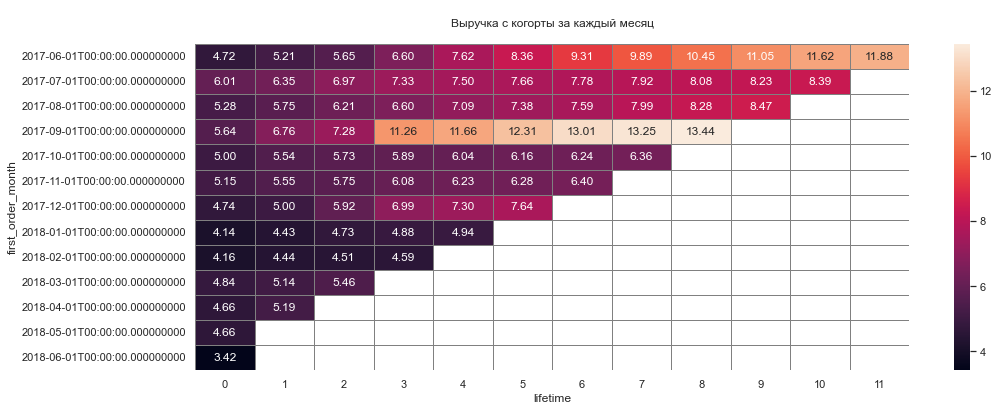

In [37]:
#ltv_by_user['first_order_month'] = ltv_by_user['first_order_month'].astype('datetime64[M]').dt.date
#ltv_by_user['order_month'] = ltv_by_user['order_month'].astype('datetime64[M]').dt.date

ltv_by_user_pivot = ltv_by_user.pivot_table(
        index='first_order_month', 
        columns='lifetime', 
        values='ltv', 
        aggfunc='mean').cumsum(axis=1)
    
plt.figure(figsize=(16, 6))
 
sns.heatmap(ltv_by_user_pivot, annot=True, fmt='.2f', linewidths=1, linecolor='gray')
plt.title("\n" + 'Выручка с когорты за каждый месяц' + "\n")
plt.show()

На таблице можно отследить рост показателя LTV для каждой когорты по ее возрасту. Из нее видно, что когорта 2017-09-01 и 2017-06-01 принесли больше всего дохода за все время.


### Выводы по метрикам продаж

Типичный клиент покупает 1-2 раза и тратит сравнительно маленькую сумму в 5-7 у.е. 
В летнии месяцы клиенты не так часто обращаются за покупками на сайте, чем в осенние месяцы из-за частых отпусков и каникул. Многие люди уезжают в места, где они не нуждаются в услугах Афиши (деревня, отечественные или зарубежные курорты и т.д.). Осенью люди возвращаются в большие города, где чаще используют Афишу. Для повышения уровня продаж летом можно посоветовать расширение услуг в местах, куда люди путешествуют во время отпусков и каникул.
Снижение продаж после Нового Года связаны с большими тратами в предногодние месяцы. Повышение продаж возможно снижением цен на услуги.

**2.3. Маркетинговые метрики:** <a id="step2.3"> </a>   

Посчитайте и отобразите на графиках, как маркетинговые метрики различаются по рекламным источникам.
Один и тот же пользователь мог заходить на сайт из нескольких источников, поэтому важно определить «главный» источник для каждого и учитывать это в расчётах. Например, главным может стать первый источник перехода.

    2.3.1. Посчитайте общую сумму расходов на маркетинг. Выясните, как траты распределены по источникам. Визуализируйте изменения метрик во времени;
    2.3.2. Рассчитайте средний CAC на одного покупателя для всего проекта и для каждого источника трафика. Отразите изменения метрик на графиках;
    2.3.3. Рассчитайте ROMI по когортам в разрезе источников. Сравните окупаемость за одинаковые периоды жизни когорт. Обратите внимание, что клиенты, пришедшие из разных источников, могут иметь разный LTV. Постройте графики, отражающие изменения метрик во времени.

In [38]:
#Выведем общую сумму расходов на маркетинг
costs_total = costs.costs.sum()
print(f'Общая сумма расходов на маркетинг {costs_total}')

Общая сумма расходов на маркетинг 329131.62


In [39]:
# Выясним сумммартные траты по источникам
costs_source_pivot = costs.groupby('source_id').agg({'costs':'sum'}).reset_index().\
    rename(columns={'costs':'costs_source_sum'}).sort_values('costs_source_sum', ascending=False)
display(costs_source_pivot)

,source_id,costs_source_sum
2,3,141321.63
3,4,61073.60
4,5,51757.10
1,2,42806.04
0,1,20833.27
6,10,5822.49
5,9,5517.49


По количеству затрат по источникам можно выделить 3 источник как самый большой, меньше всего было потрачено на 9 и 10 источник.

,costs
dt_month,
2017-06-01,18015.00
2017-07-01,18240.59
2017-08-01,14790.54
2017-09-01,24368.91
2017-10-01,36322.88
2017-11-01,37907.88
2017-12-01,38315.35
2018-01-01,33518.52
2018-02-01,32723.03


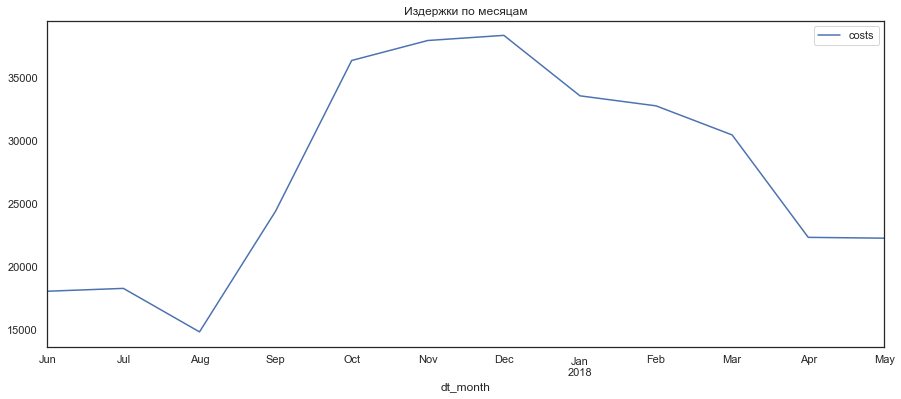

In [40]:
# Визуализируем данные по месяцу, для этого сгруппируем данные по месяцу затрат на маркетинг

costs['dt_month'] = costs.dt.astype('datetime64[M]')

# Сгрупируем данные по месяцу и получим суммарные затраты в месяц
costs_month = costs.pivot_table(index='dt_month', values='costs', aggfunc='sum')
display(costs_month)
# Построим график 
costs_month.plot(figsize=(15,6))
plt.title('Издержки по месяцам')
plt.show()

Издержки резко увеличились после сентября и после января начали снижаться.

In [41]:
#Выведем в отдельную таблицу даннные когда пришел покупатель, через какой источник и каким девайсом он пользуется.
first_visits = visits.pivot_table(index='uid', aggfunc={'start_ts':'min','source_id':'first', 'device':'first' }).\
    reset_index().rename(columns={'start_ts':'first_start_ts'})
first_visits

,uid,device,source_id,first_start_ts
0,11863502262781,touch,3,2018-03-01 17:27:00
1,49537067089222,touch,2,2018-02-06 15:55:00
2,297729379853735,desktop,3,2017-06-07 18:47:00
3,313578113262317,desktop,2,2017-09-18 22:49:00
4,325320750514679,desktop,5,2017-09-30 14:29:00
...,...,...,...,...
228164,18446403737806311543,desktop,5,2017-11-30 03:36:00
228165,18446424184725333426,touch,4,2017-12-06 20:32:00
228166,18446556406699109058,touch,3,2018-01-01 16:29:00
228167,18446621818809592527,desktop,4,2017-12-27 13:27:00


In [42]:
# Добавим в таблицу заказов информацию об устройствах клиентов и источников 
orders_users = orders.merge(first_visits, on='uid')
# Посчитаем количесвто уникальных клиентов по каждому источнику
orders_users_count = orders_users.groupby('source_id').agg({'uid':'nunique'}).\
        reset_index().rename(columns={'uid':'user_count'})
orders_users_count

,source_id,user_count
0,1,3743
1,2,4323
2,3,9138
3,4,9823
4,5,6839
5,7,1
6,9,1415
7,10,1241


In [43]:
# В таблице costs_source_pivot собраны данные по затратам на источники
costs_source_pivot = costs_source_pivot.merge(orders_users_count, on='source_id')
display(costs_source_pivot)

,source_id,costs_source_sum,user_count
0,3,141321.63,9138
1,4,61073.60,9823
2,5,51757.10,6839
3,2,42806.04,4323
4,1,20833.27,3743
5,10,5822.49,1241
6,9,5517.49,1415


CAC на одного покупателя для всего проекта 9.01163


,source_id,costs_source_sum,user_count,cac
6,9,5517.49,1415,3.899286
5,10,5822.49,1241,4.691773
4,1,20833.27,3743,5.565928
1,4,61073.60,9823,6.217408
2,5,51757.10,6839,7.567934
3,2,42806.04,4323,9.901929
0,3,141321.63,9138,15.465269


Text(0.5, 1.0, 'CAC')

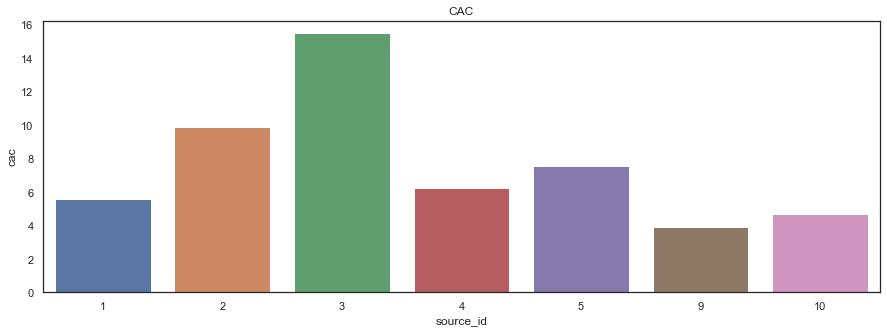

In [44]:
# Посчитаем CAC по всему проекту и для каждого источника
costs_source_pivot['cac'] = costs_source_pivot.costs_source_sum / costs_source_pivot.user_count
costs_source_pivot = costs_source_pivot.sort_values('cac')
cac_all_project = ((costs.costs.sum() / orders.uid.nunique()).round(5))
print(f'CAC на одного покупателя для всего проекта {cac_all_project}')

display(costs_source_pivot)
plt.figure(figsize=(15,5))
a=sns.barplot(data=costs_source_pivot, x='source_id', y='cac')
a.set_title('CAC')

Наиболее прибыльными источниками являеются источник 9, 10 и 1. Источник 3 и 2 нименее выгодный. Больше всего клиентов было привлечено 4 и 3 источниками.

In [45]:
#----------------------------------------------------------

In [46]:
# Продублируем формирование таблиц из кода ранее 
#Выведем в отдельную таблицу даннные когда пришел покупатель, через какой источник и каким девайсом он пользуется.
first_visits = visits.pivot_table(index='uid', aggfunc={'start_ts':'min','source_id':'first', 'device':'first' }).\
    reset_index().rename(columns={'start_ts':'first_start_ts'})
# Добавим в таблицу заказов информацию об устройствах клиентов и источников 
orders_users = orders.merge(first_visits, on='uid')

In [47]:
# Переименуем колонку с месяцем к одному формату колонок costs и orders_users
orders_users = orders_users.rename(columns={'first_start_ts':'cohort_month'})
costs = costs.rename(columns={'dt_month':'cohort_month'})
orders_users.cohort_month = orders_users.cohort_month.astype('datetime64[M]')

# Источник 7 аномальный, трат по нему не отмечено в таблице costs, по этому для дальнейшего расчета исключим его из анализа
orders_users = orders_users.loc[orders_users.source_id != 7]
#cohots_pivot = orders_users.pivot_table(index='cohort_month', columns='source_id', values='revenue', aggfunc='sum')
#display(cohots_pivot)
# Сформируем единую таблицу с затратами и прибылью по источнакам по времени для дальнейшего анализа ROMI
costs_romi_pivot = costs.groupby(['cohort_month', 'source_id']).agg({'costs':'sum'})
revenue_romi_pivot = orders_users.groupby(['cohort_month', 'source_id']).agg({'revenue':'sum'})
cohort_romi= costs_romi_pivot.merge(revenue_romi_pivot, on=['cohort_month', 'source_id'])
cohort_romi['romi'] = cohort_romi.revenue / cohort_romi.costs
#display(cohort_romi)

source_id,1,2,3,4,5,9,10
cohort_month,,,,,,,
2017-06-01,10.881486,4.390392,0.626053,1.778775,1.867563,2.982925,0.927917
2017-07-01,2.579356,1.348145,0.440582,1.121380,1.014999,4.279434,0.673792
2017-08-01,2.369832,0.706320,0.359044,0.899902,1.765884,2.885550,1.064110
2017-09-01,1.947058,5.891900,0.430851,0.787701,0.984477,1.740941,0.588556
2017-10-01,1.506765,1.001800,0.376704,1.027345,0.992041,1.283208,0.775588
2017-11-01,1.304651,0.987995,0.292455,1.165821,0.525809,1.342867,0.690444
2017-12-01,0.981031,2.822802,0.305461,0.717435,0.628023,0.934177,0.415136
2018-01-01,0.888888,0.354673,0.231777,0.644158,0.606990,0.615688,0.556670
2018-02-01,0.932996,0.403599,0.233542,0.744688,0.597045,0.537407,0.619489


,source_id,costs,revenue,romi
0,1,20833.27,38560.06,1.850889
1,2,42806.04,65152.26,1.522034
2,3,141321.63,44317.68,0.313594
3,4,61073.60,52479.75,0.859287
4,5,51757.10,40357.91,0.779756
5,9,5517.49,7076.98,1.282645
6,10,5822.49,4111.34,0.706114


Text(0.5, 1.0, 'ROMI_sourse')

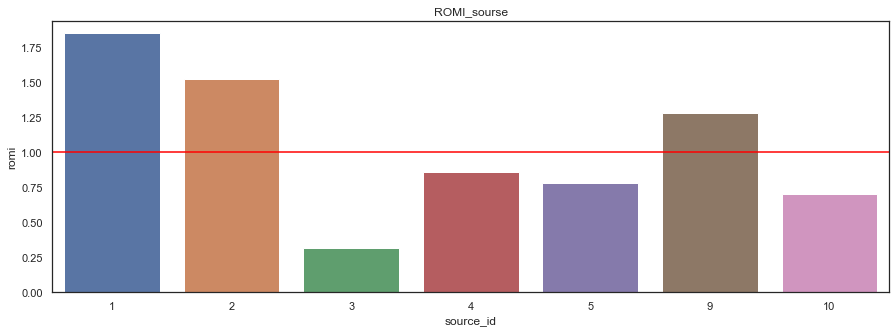

In [48]:
cohort_romi_pivot = cohort_romi.pivot_table(index='cohort_month', columns='source_id', values='romi', aggfunc='sum')
display(cohort_romi_pivot)
romi_all = cohort_romi.groupby('source_id').agg({'costs':'sum', 'revenue':'sum'}).reset_index()
romi_all['romi'] = romi_all.revenue / romi_all.costs

display(romi_all)
# Построим графики, отражающие изменения метрик во времени.
plt.figure(figsize=(15,5))
a = sns.barplot(data=romi_all, x='source_id', y='romi')
plt.axhline(y=1, color = 'red')
a.set_title('ROMI_sourse')



Из графика видно что источники 1,2 и 9 окупились. Источники 3, 4, 5, 10 не окупились.

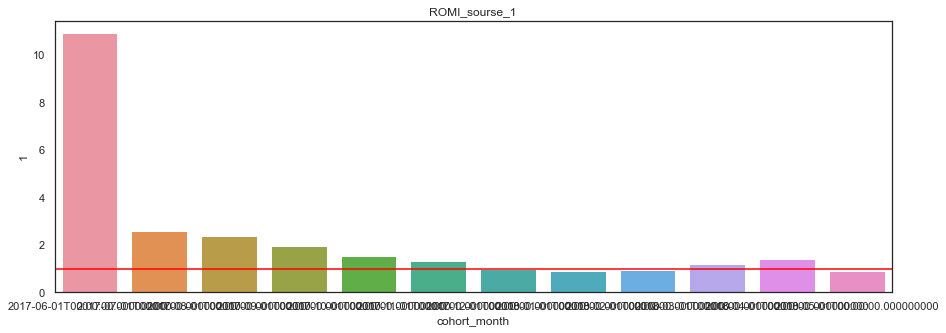

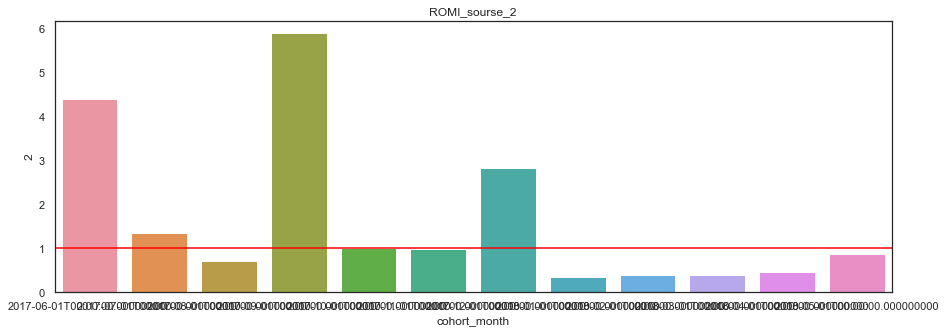

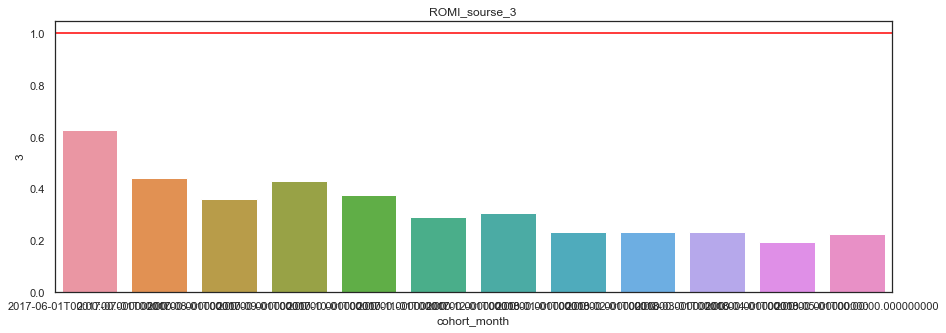

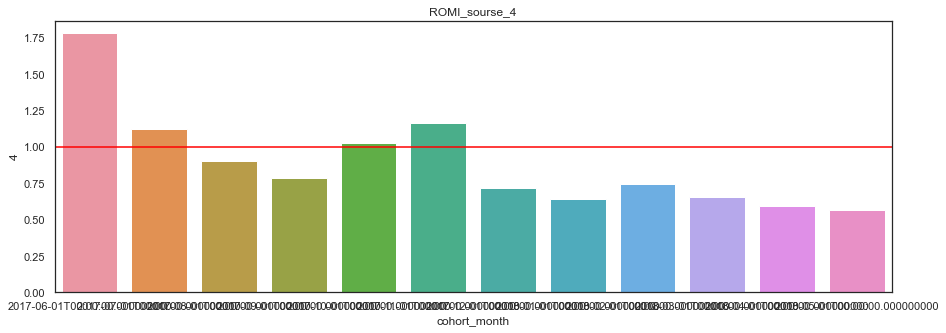

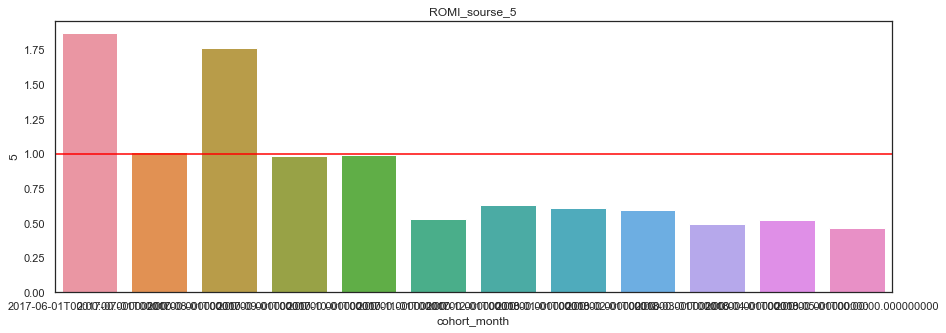

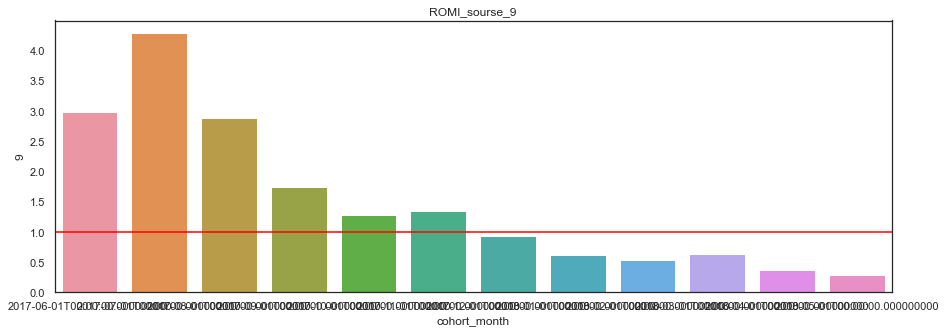

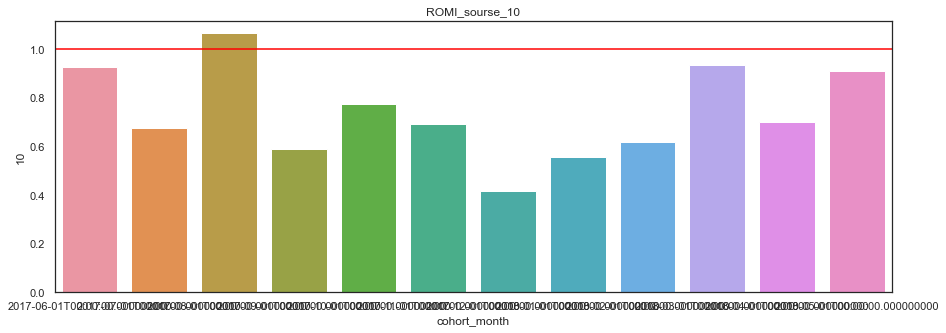

In [54]:
# Построим графики по каждому источнику от времени 
for i in cohort_romi_pivot.columns.values.tolist ():
    df = pd.DataFrame(cohort_romi_pivot[i], index=cohort_romi_pivot.reset_index().cohort_month)
    plt.figure(figsize=(15,5))
    a = sns.barplot(data=df.reset_index(), x='cohort_month', y=i)
    plt.axhline(y=1, color = 'red')
    a.set_title(f'ROMI_sourse_{i}')

Судя по графикам проанализируем затраты на источники : 
- Источник 1 - имел высокую окупаемость в первый месяц, в дальнейшем резкий спад и снижения окупаемости.
- Источник 2 - имел высокую окупаемость в первый месяц, в дальнейшем окупаемость упала, но в 4 и 7й месяц также наблюдается резкое увеличение окупаемости, в остальное время источник не окупается. 
- Источник 3 - не окупался в течении всего времени наблюдения
- Источник 4,5,10 - окупались толь в некоторых месяцах, в отсальное время не окупались
- Источник 9 - вначале 6 месяцев окупался, в дальнейшем стал убыточным

### Шаг 3. Формулирование выводов и рекомендаций <a id="step3"></a>   

1 и 2 источник приносили среднее количество пользователей и быстро окупались. 3, 4 и 5 источники принесли много пользователей но не окупился. 10 не окупался, а 9 окупился но они принесли меньше всего пользоватлей. Т.е. рекламный бюджет следует делить между 1, 2 и 9 источниками. 
Необходимо сократить затраты на 3, 4 и 5 источники. А от 10 источника следует отакзатся.
Часто покупатели тратят на покупку 1 минуту, что достаточно быстро для изучения  и оформление товара, стоит обратить внимание на эти данные. 
Необходимо стимулировать покупателей снова заходить на сайт для новых покупок особенно после Нового Года, так как многие забывают о сайте и не заходят. Следует расширить географию предоставления услуг в местах, где люди проводят летние отпуска и каникулы.